# Diagnostic Wisconsin Breast Cancer Database

Misc notes: use scikit and pandas workbooks from Brian

In [1]:
# did you use all of these?

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

## Dataset Review

Breast cancer is the second most common cancer after lung cancer, and affects about 1 in 8 women during their lifetimes ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022). The best tool against breast cancer is early diagnosis, but this is notoriously difficult, and even then there can be significant variation in patient prognoses ([Mohammad et al](https://www.hindawi.com/journals/abb/2022/6187275/), 2022). With this, there has been a large amount of academic literature dedicated to improving early detection models using machine-learning and algorithms on existing datasets.

The Wisconsin dataset consists of 569 results from Fine Needle Aspiration (FNA) examinations on patients presenting with possible breast cancer symptoms. The FNA examination is defined by the American Cancer Society as "a small amount of breast tissue or fluid... removed from a suspicious area with a thin, hollow needle and checked for cancer cells" ([ACS](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), 2022). Each sample is then analysed by medical imaging software to produce the data seen below. The data was collected by Dr. William Wolberg of Wisconsin Hospital, while the images were converted into a digital format by William Street, a computer science researcher at the University of Wisconsin ([Mohammad et al](https://www.hindawi.com/journals/abb/2022/6187275/), 2022).

In [12]:
# import the data using pandas' read_csv function and display the first ten rows
df = pd.read_csv('data.csv')
df[:10]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


Each result consists of 32 attributes, starting with a unique whole-number ID and an initial diagnosis item, which is a boolean (malignant/benign). These are followed by ten variables: 
 - <i>radius</i>: DESCRIPTION
 - <i>texture</i>: DESCRIPTION
 - <i>perimeter</i>: DESCRIPTION
 - <i>area</i>: DESCRIPTION
 - <i>smoothness</i>: DESCRIPTION
 - <i>compactness</i>: DESCRIPTION
 - <i>concavity</i>: DESCRIPTION
 - <i>concave points</i>: DESCRIPTION
 - <i>symmetry</i>: DESCRIPTION
 - <i>fractal dimension</i>: DESCRIPTION

For each of these, there is a mean, standard error and 'worst' value, which is in fact the mean of exclusively the largest three values ([Kalshtein](https://rpubs.com/Yael_K/329390), 2017). Of these, the radius, texture, perimeter and area are real values that track size, while the remaining items seem to be determined on a scale largely between 0 and 1. We can use Pandas' `describe` function to show the summary of each of these 30 numerical columns.

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Ultimately, the piece of information that needs to be predicted with accuracy, and undoubtedly the most important piece of information from any perspective, is that of the diagnosis. In the existing data, there are 357 benign diagnoses, leaving 212 malignant cases in the data. ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022)

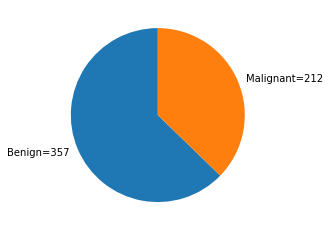

In [27]:
# code taken from Paithankar and Matplotlib Pie Charts links in README
mb_count = df['diagnosis'].value_counts()
mb_b = f'Benign={mb_count[0]}'
mb_m = f'Malignant={mb_count[1]}'
mb_labels = [mb_b,mb_m]
# Visualize this count 
plt.pie(mb_count, labels=mb_labels,startangle=90)
plt.show();

## Statistical Analysis

The above table gives us a cursory glance at summarised values, but does not tell us much more than that about each of the variables.

- Present a statistical analysis of the dataset

- SS - box plots on mean/se/worst items?
- SS - this is similar to the first assignment for this module
- SS - which items correlate most and least with the malignant/benign variable?b

## Existing Literature

- Provide a literature review on classifiers which have been applied to the dataset and compare their performance

- SS - this only needs to be a high-level review of a couple of classifiers in plain English rather than anything in real depth and using lots of technical or scientific language

## Classifier Training

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers

- SS - examples of algorithms we've used so far are Nearest Neighbours
- SS - pick a few examples and test them, especially if they've been mentioned previously in literature

## Performance Versus Previous Models

- Compare, contrast and critique your results with reference to the literature

- SS - how did something run when you did it, as opposed to the literature's results? chances are it won't get as strong as a result as somebody who is doing actual research, but you can still compare and contrast

## Data Synthesis

- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- SS - this is quite a small dataset, so in a real-world scenario you'd be looking at synthesising some data to enable a machine to better learn from it